In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
#calculate TSP
vol_D2O_TSP_uL = 5
total_vol_uL = 600
uL_to_L = 1e-6
D2O_density = 1.11 # 1 g/mL = 1 mg/uL
D2O_TSP_mg = vol_D2O_TSP_uL * D2O_density
TSP_wt_frac = 0.75/100
TSP_Mw = 172.27
TSP_mmol = TSP_wt_frac * D2O_TSP_mg / TSP_Mw
TSP_mM = TSP_mmol / (total_vol_uL * uL_to_L)
print('TSP:', '%.2f' % TSP_mM, 'mM')

TSP: 0.40 mM


In [3]:
control = np.loadtxt('integrals_expno10.txt', usecols=1, delimiter=';')[:196]
time_step = 5 # min

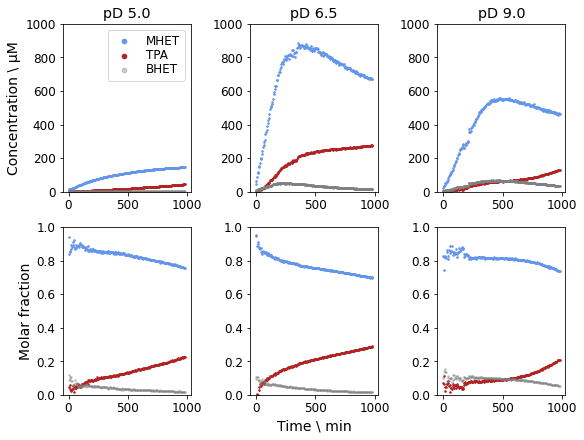

In [20]:
fig, axs = plt.subplots(2,3, constrained_layout=True, figsize=(8,6))
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
size=2.4
c1 = 'cornflowerblue'
c2 = 'firebrick'
c3 = 'grey'


data = np.loadtxt('141_pH5_TSP.txt', delimiter=';', usecols=(1,2,3,4,5))
time = np.linspace(0,len(data)*time_step, num=len(data), dtype=int)
TSP = (data[:,4]/9)
BHET = 1e3 * TSP_mM * (data[:,0]/4)/TSP
MHET = 1e3 * TSP_mM * ((data[:,1] + data[:,2])/4)/TSP
TPA = 1e3 * TSP_mM * (data[:,3]/4)/TSP
axs[0,0].scatter(time,MHET, color=c1, s=size, label='MHET')
axs[0,0].scatter(time, TPA, s=size, color=c2, label='TPA')
axs[0,0].scatter(time,BHET,s=size, color=c3, alpha=0.4, label='BHET')
axs[0,0].set_title('pD 5.0')
axs[0,0].legend(loc='best', markerscale=3, labelspacing=0.1)
axs[0,0].set_ylabel(r'Concentration \ µM', fontsize='14')
axs[0,0].set_ylim(0,1000)

axs[1,0].scatter(time,MHET/(MHET+TPA+BHET), color=c1, s=size)
axs[1,0].scatter(time, TPA/(MHET+TPA+BHET), s=size, color=c2)
axs[1,0].scatter(time,BHET/(MHET+TPA+BHET),s=size, color=c3, alpha=0.4)
axs[1,0].set_ylabel(r'Molar fraction', fontsize='14')
axs[1,0].set_ylim(0,1)

data = np.loadtxt('137_pH6p5_TSP.txt', delimiter=';', usecols=(1,2,3,4,5))
time = np.linspace(0,len(data)*time_step, num=len(data), dtype=int)
TSP = (data[:,4]/9)
BHET = 1e3 * TSP_mM * (data[:,0]/4)/TSP
MHET = 1e3 * TSP_mM * ((data[:,1] + data[:,2])/4)/TSP
TPA = 1e3 * TSP_mM * (data[:,3]/4)/TSP
axs[0,1].scatter(time,MHET, color=c1, s=size, label='MHET')
axs[0,1].scatter(time, TPA, s=size, color=c2, label='TPA')
axs[0,1].scatter(time,BHET,s=size, color=c3, label='BHET')
axs[0,1].set_title('pD 6.5')
axs[0,1].set_ylim(0,1000)


axs[1,1].scatter(time,MHET/(MHET+TPA+BHET), color=c1, s=size)
axs[1,1].scatter(time, TPA/(MHET+TPA+BHET), s=size, color=c2)
axs[1,1].scatter(time,BHET/(MHET+TPA+BHET),s=size, color=c3, alpha=0.4)
axs[1,1].set_ylim(0,1)
axs[1,1].set_xlabel(r'Time \ min', fontsize='14')


data = np.loadtxt('133_pH9_TSP.txt', delimiter=';', usecols=(1,2,3,4,5))
time = np.linspace(0,len(data)*time_step, num=len(data), dtype=int)
TSP = (data[:,4]/9)
BHET = 1e3 * TSP_mM * (data[:,0]/4)/TSP
MHET = 1e3 * TSP_mM * ((data[:,1] + data[:,2])/4)/TSP
TPA = 1e3 * TSP_mM * (data[:,3]/4)/TSP
axs[0,2].scatter(time,MHET, color=c1, s=size, label='MHET')
axs[0,2].scatter(time, TPA, s=size, color=c2, label='TPA')
axs[0,2].scatter(time,BHET,s=size, color=c3, label='BHET')
axs[0,2].set_title('pD 9.0')
axs[0,2].set_ylim(0,1000)

axs[1,2].scatter(time,MHET/(MHET+TPA+BHET), color=c1, s=size)
axs[1,2].scatter(time, TPA/(MHET+TPA+BHET), s=size, color=c2)
axs[1,2].scatter(time,BHET/(MHET+TPA+BHET),s=size, color=c3, alpha=0.4)
axs[1,2].set_ylim(0,1)



plt.savefig('integrals2.png', dpi=300)
plt.show()